# Market Trend Classification Model

## Overview
The Market Trend Classification Model aims to identify different market conditions (regimes) in historical stock price data using clustering techniques. By classifying these regimes, the project provides insights into periods of market behavior, such as bull, bear, or neutral phases, helping investors or financial analysts understand market trends and develop effective strategies.


# Requirements

In [1]:
pip install pandas numpy matplotlib scikit-learn yfinance


## Steps Involved
### 1: **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


### 2. **Data Collection**
Historical stock price data is collected using Yahoo Finance (via the `yfinance` library). In this example, the data of the S&P 500 index is fetched to observe trends and detect market regimes over time.


In [3]:
# Download historical stock data for a selected stock (e.g., S&P 500: ^GSPC)
stock_data = yf.download('^GSPC', start='2010-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [6]:
# Basic information about the dataset
print("Dataset Information:")
print("===================")
print(f"Number of records: {len(stock_data)}")
print(f"Date range: {stock_data.index.min()} to {stock_data.index.max()}")
print("\nDataset Overview:")
print(stock_data.head())

# Display basic statistics
print("\nBasic Statistics:")
print(stock_data.describe())

# Check for missing values
print("\nMissing Values:")
print(stock_data.isnull().sum())

# Plotting functions
plt.style.use('seaborn')


Dataset Information:
Number of records: 3323
Date range: 2010-10-18 00:00:00+00:00 to 2023-12-29 00:00:00+00:00

Dataset Overview:
Price                        Adj Close        Close         High          Low  \
Ticker                           ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                            
2010-10-18 00:00:00+00:00  1184.709961  1184.709961  1185.530029  1174.550049   
2010-10-19 00:00:00+00:00  1165.900024  1165.900024  1178.640015  1159.709961   
2010-10-20 00:00:00+00:00  1178.170044  1178.170044  1182.939941  1166.739990   
2010-10-21 00:00:00+00:00  1180.260010  1180.260010  1189.430054  1171.170044   
2010-10-22 00:00:00+00:00  1183.079956  1183.079956  1183.930054  1178.989990   

Price                             Open      Volume    Return        MA_50  \
Ticker                           ^GSPC       ^GSPC                          
Date                                                              

<ipython-input-6-9b9f3246609b>:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Eda to Market Trand Classification

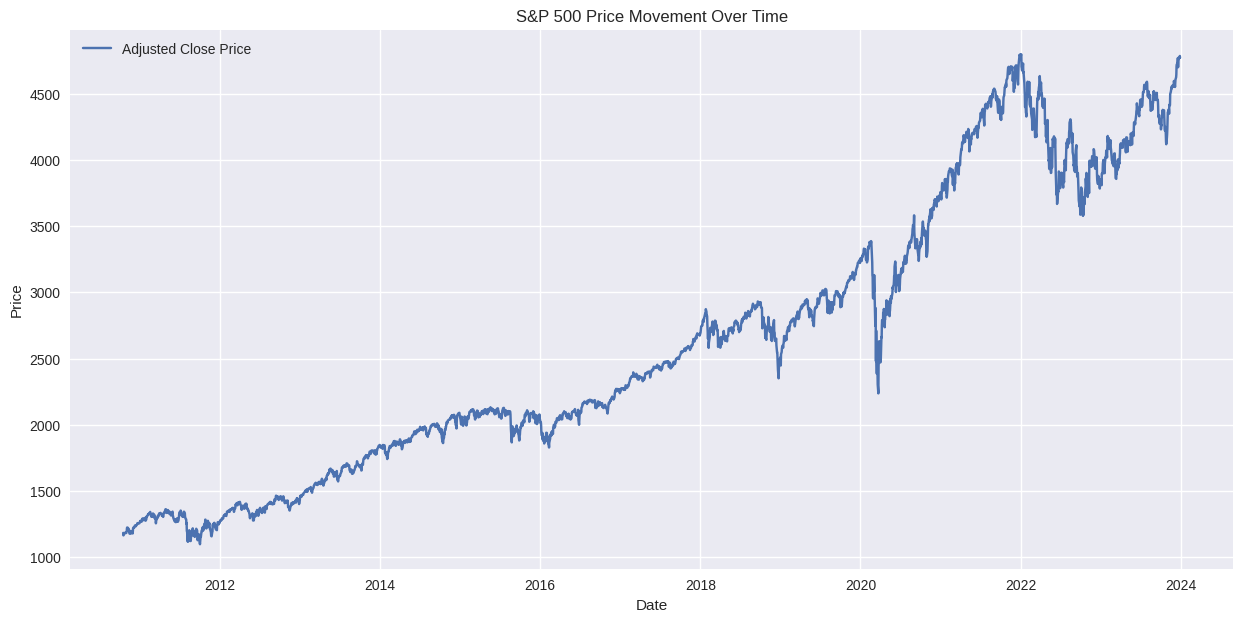

In [7]:
# 1. Price Movement Over Time
plt.figure(figsize=(15, 7))
plt.plot(stock_data['Adj Close'], label='Adjusted Close Price')
plt.title('S&P 500 Price Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

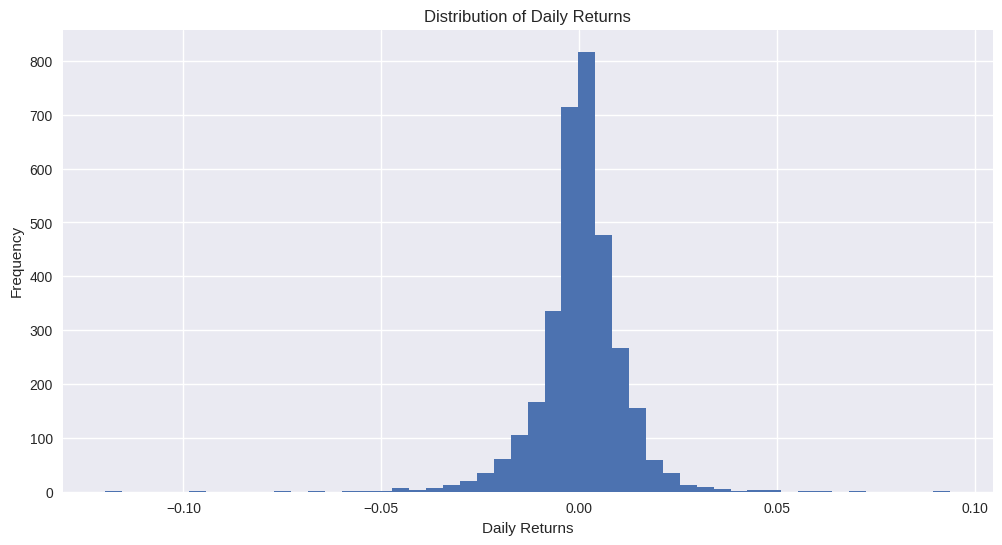

In [8]:
# 2. Daily Returns Distribution
plt.figure(figsize=(12, 6))
stock_data['Daily Returns'] = stock_data['Adj Close'].pct_change()
plt.hist(stock_data['Daily Returns'].dropna(), bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

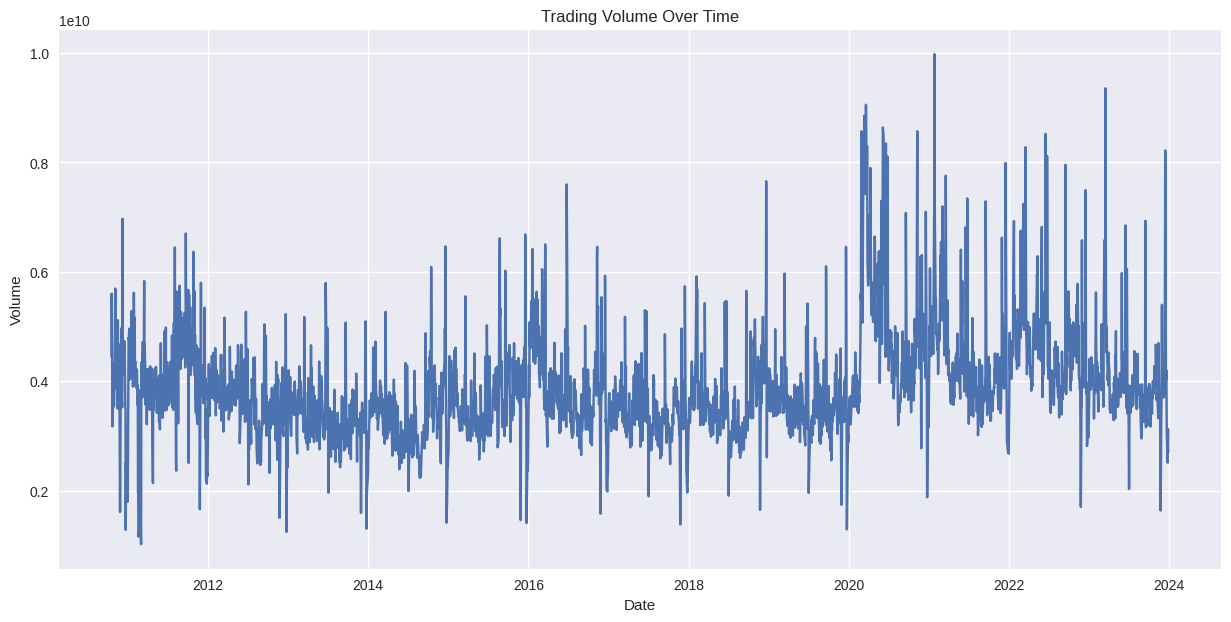

In [9]:
# 3. Volume Analysis
plt.figure(figsize=(15, 7))
plt.plot(stock_data['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

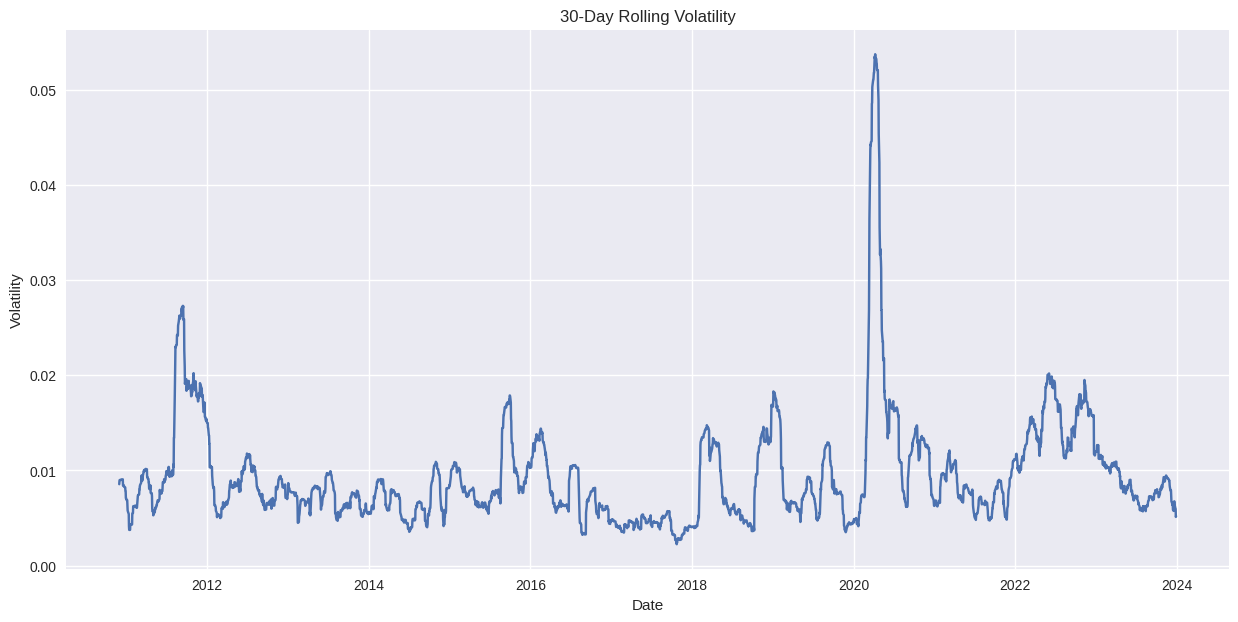

In [10]:
# 4. Volatility Analysis
# Calculate rolling volatility (30-day window)
stock_data['Volatility'] = stock_data['Daily Returns'].rolling(window=30).std()
plt.figure(figsize=(15, 7))
plt.plot(stock_data['Volatility'])
plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

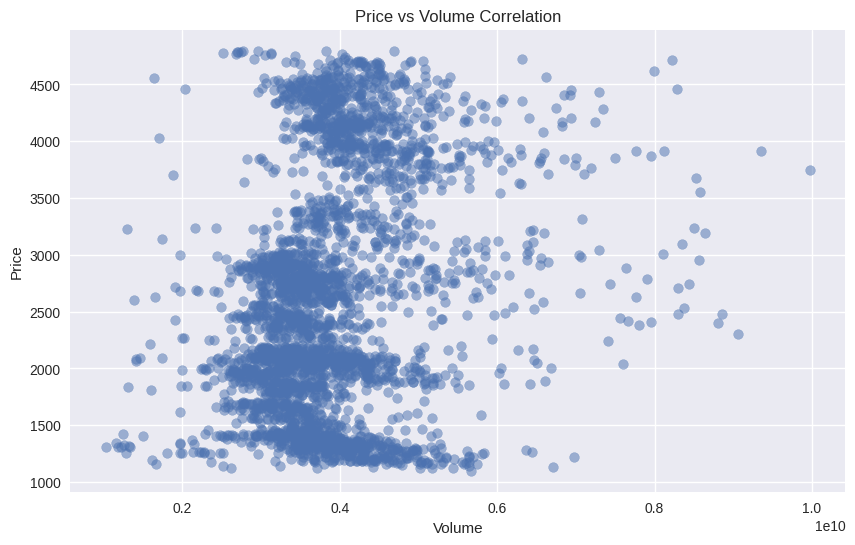

In [11]:
# 5. Price vs Volume Correlation
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Volume'], stock_data['Adj Close'], alpha=0.5)
plt.title('Price vs Volume Correlation')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

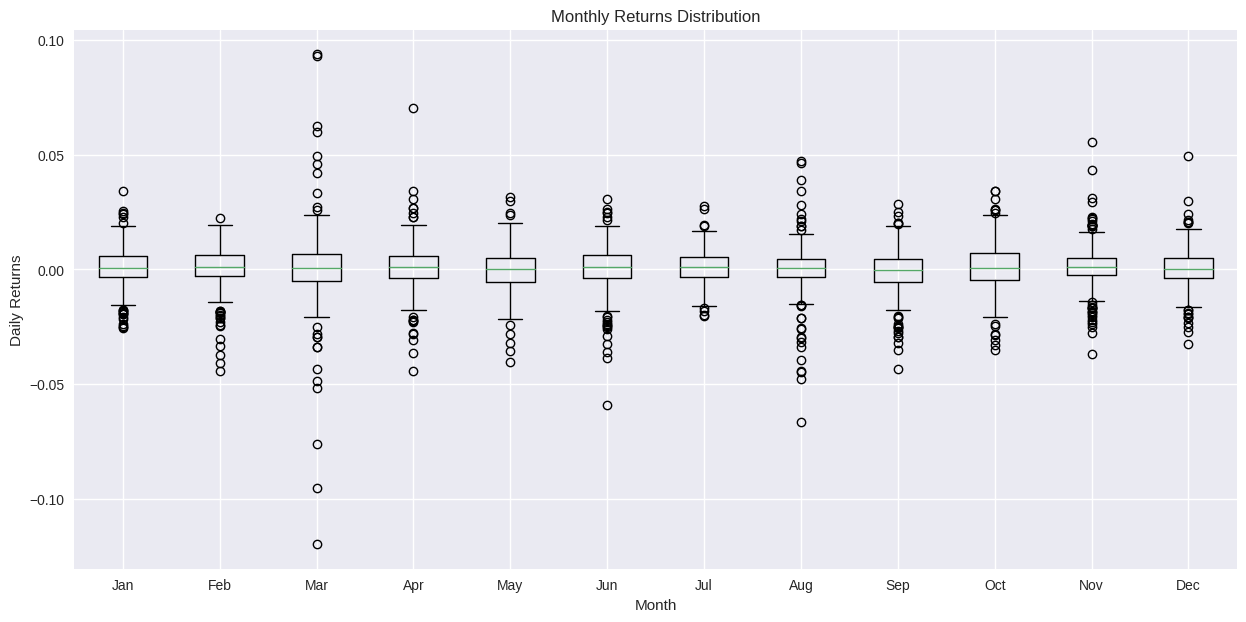

In [12]:
# 6. Monthly Returns Box Plot
stock_data['Month'] = stock_data.index.month
plt.figure(figsize=(15, 7))
plt.boxplot([stock_data[stock_data['Month']==i]['Daily Returns'].dropna()
             for i in range(1,13)])
plt.title('Monthly Returns Distribution')
plt.xlabel('Month')
plt.ylabel('Daily Returns')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

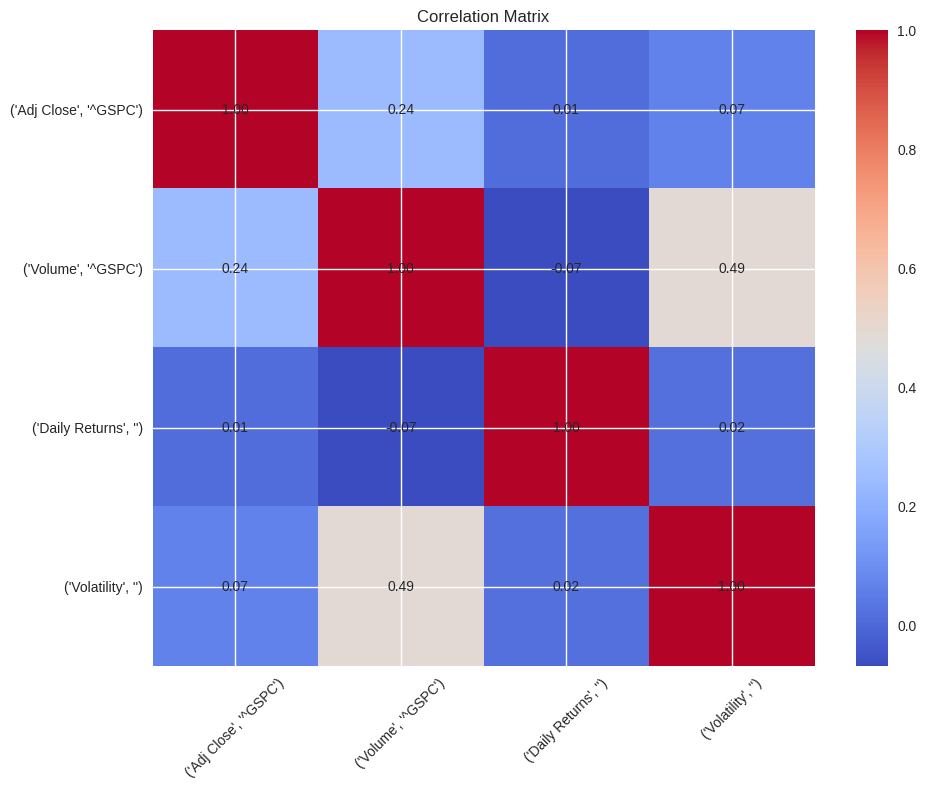

In [13]:
# 7. Correlation Matrix
correlation_matrix = stock_data[['Adj Close', 'Volume', 'Daily Returns', 'Volatility']].corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                ha='center', va='center')
plt.tight_layout()
plt.show()

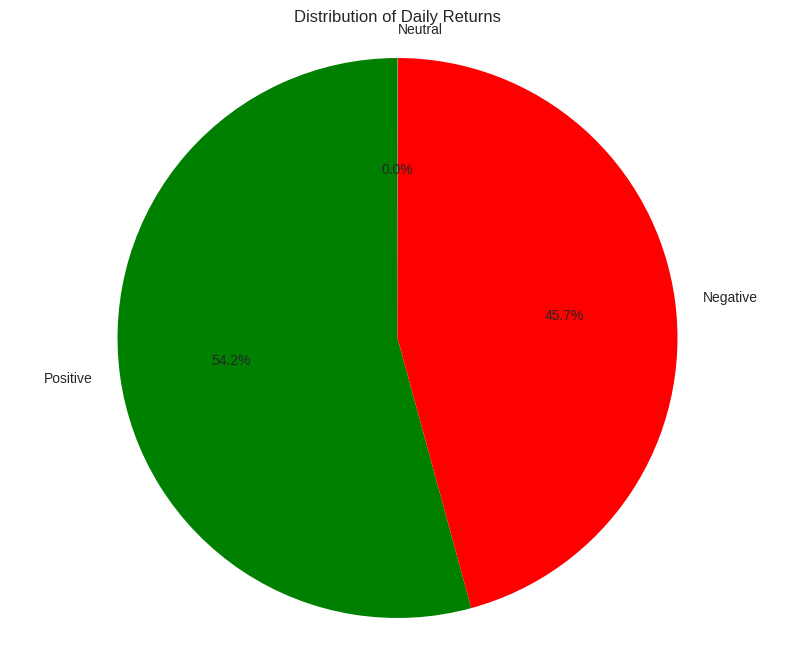

In [15]:
# 8. Pie Chart: Distribution of Daily Returns (Positive vs Negative)
positive_returns = (stock_data['Daily Returns'] > 0).sum()
negative_returns = (stock_data['Daily Returns'] < 0).sum()
neutral_returns = (stock_data['Daily Returns'] == 0).sum()

plt.figure(figsize=(10, 8))
plt.pie([positive_returns, negative_returns, neutral_returns],
        labels=['Positive', 'Negative', 'Neutral'],
        autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'gray'])
plt.title('Distribution of Daily Returns')
plt.axis('equal')
plt.show()

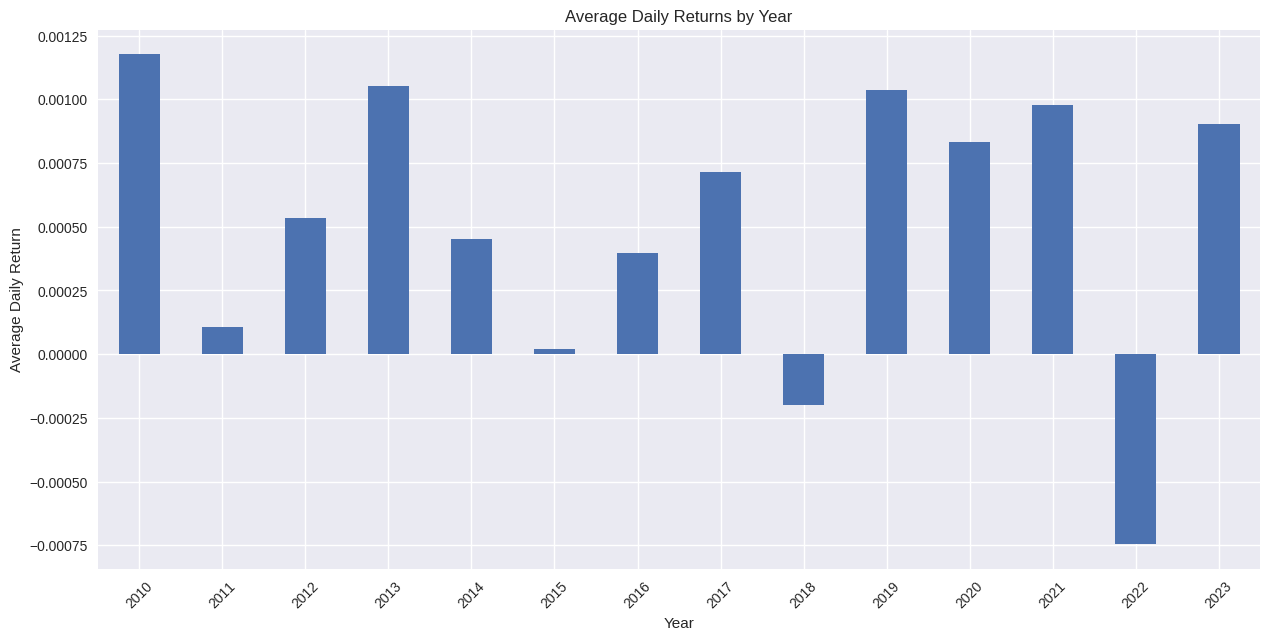

In [17]:
# 9. Bar Chart: Average Returns by Year
stock_data['Year'] = stock_data.index.year
yearly_returns = stock_data.groupby('Year')['Daily Returns'].mean()

plt.figure(figsize=(15, 7))
yearly_returns.plot(kind='bar')
plt.title('Average Daily Returns by Year')
plt.xlabel('Year')
plt.ylabel('Average Daily Return')
plt.xticks(rotation=45)
plt.show()

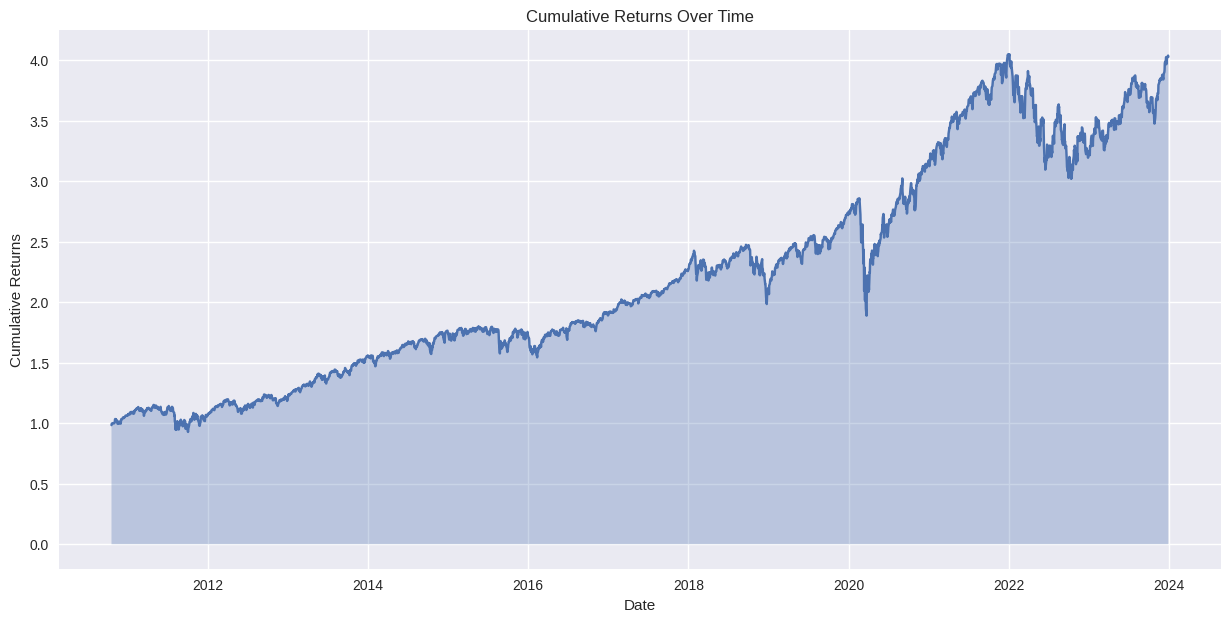

In [18]:
# 10. Area Chart: Cumulative Returns
stock_data['Cumulative Returns'] = (1 + stock_data['Daily Returns']).cumprod()

plt.figure(figsize=(15, 7))
plt.fill_between(stock_data.index, stock_data['Cumulative Returns'], alpha=0.3)
plt.plot(stock_data.index, stock_data['Cumulative Returns'])
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

In [23]:
# Summary statistics
print("\nSummary Statistics:")
print("==================")
print(f"Average Daily Return: {stock_data['Daily Returns'].mean():.4f}")
print(f"Daily Return Std Dev: {stock_data['Daily Returns'].std():.4f}")
print(f"Maximum Daily Return: {stock_data['Daily Returns'].max():.4f}")
print(f"Minimum Daily Return: {stock_data['Daily Returns'].min():.4f}")



Summary Statistics:
Average Daily Return: 0.0005
Daily Return Std Dev: 0.0110
Maximum Daily Return: 0.0938
Minimum Daily Return: -0.1198
